In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
import calendar

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_usa = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')].copy()

In [161]:

df_usa['month_no'] = df_usa['job_posted_date'].dt.month
# df_usa.dropna(subset='job_skills',inplace=True)
df_skills = df_usa.copy()

In [162]:
df_explodes_skills = df_skills.explode(column='job_skills')

In [163]:
df_skill_pivot = df_explodes_skills.pivot_table(index='month_no',columns='job_skills',aggfunc='size',fill_value=0)

In [164]:
df_skill_pivot.loc['Total'] = df_skill_pivot.sum()
df_skill_pivot = df_skill_pivot[df_skill_pivot.loc['Total'].sort_values(ascending=False).index]
df_skill_pivot = df_skill_pivot.drop('Total')

In [165]:
df_plot = df_skill_pivot.iloc[:, :5]
df_plot.reset_index(inplace=True)
df_plot['Month Name'] = df_plot['month_no'].apply(lambda x : calendar.month_abbr[x])

C:\Users\Laptop\AppData\Local\Temp\ipykernel_13000\2385103817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Month Name'] = df_plot['month_no'].apply(lambda x : calendar.month_abbr[x])


In [166]:
df_plot = df_plot.set_index('Month Name')

df_plot = df_plot.drop(columns='month_no')
df_plot

job_skills,sql,excel,tableau,python,power bi
Month Name,,,,,
Jan,1138,781,646,529,326
Feb,782,544,408,378,302
Mar,802,580,463,400,277
Apr,845,577,462,421,292
May,706,490,367,336,251
Jun,742,491,395,396,272
Jul,560,431,296,292,190
Aug,784,641,480,460,292
Sep,485,336,277,253,183


<Axes: xlabel='Month Name'>

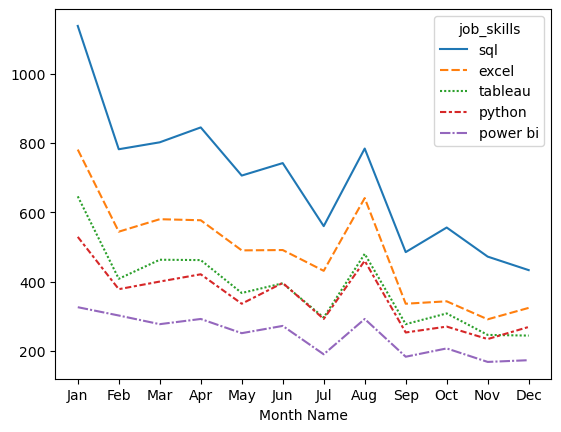

In [167]:
sns.lineplot(df_plot)

In [176]:
monthsum = df_usa.groupby(['month_no']).size()

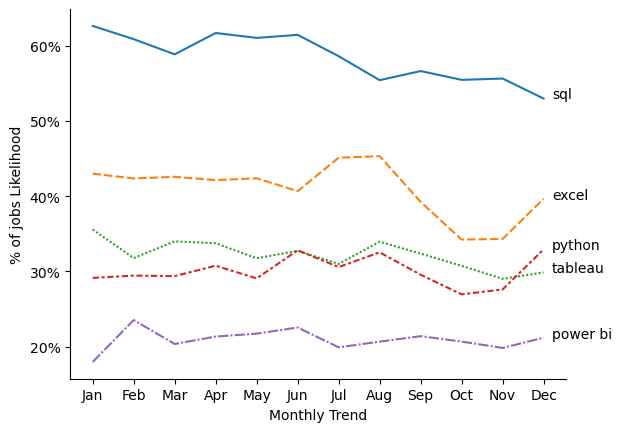

In [242]:
plotable = df_skill_pivot.iloc[:12].div(monthsum/100,axis=0)
plotable.reset_index(inplace=True)
plotable['month_name'] = plotable['month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
plotable.set_index('month_name',inplace=True)
plotable = plotable.drop(columns='month_no')
plotable
sns.lineplot(plotable.iloc[:,:5],hue_order=plotable.columns[:5],legend=False)
sns.despine()
plt.xlabel("Monthly Trend")
plt.ylabel("% of jobs Likelihood")

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'{int(x)}%'))
for i, v in enumerate(plotable.columns[:5]):
    plt.text(11.2,plotable.iloc[-1,i], v)

plt.show()